# Python Practice Lecture 20 MATH 342W Queens College 
# - Regression Trees
## Author: Amir ElTabakh
## Date: April 19, 2022

## Agenda:
* Regression Trees
* Regression Trees with Real Data
* Classification Trees

## Regression Trees

Regression trees are fast and intuitive structures to use as regression models. Nevertheless, they can be fragile to small variations in the dataset, which makes them unreliable to use as a single predictor. Random forests and gradient boosting trees are proposed to address the high-sensitivity and they can yield results comparable with deep models.

The basic idea behind the algorithm is to find the point in the independent variable to split the data-set into 2 parts, so that the mean squared error is the minimised at that point. The algorithm does this in a repetitive fashion and forms a tree-like structure.

The logic behind the algorithm itself is not rocket science. All we are doing is splitting the dataset by selecting certain points that best splits the dataset and minimizes the mean square error. The way we are selecting these points is by going through an iterative process of calculating mean square error for all the splits and choosing the split that has the least value for the MSE. So, it is only natural this works.

First I would like to walk through a quick example with mock data so we can visualize what is happening, then go more in depth with real data afterwards.

In [1]:
# importing dependencies
import numpy as np 
import pandas as pd

# Data viz
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("colorblind")) # setting color palette
sns.set(rc={"figure.figsize":(10, 6)}) #width=10, #height=6

<AxesSubplot:>

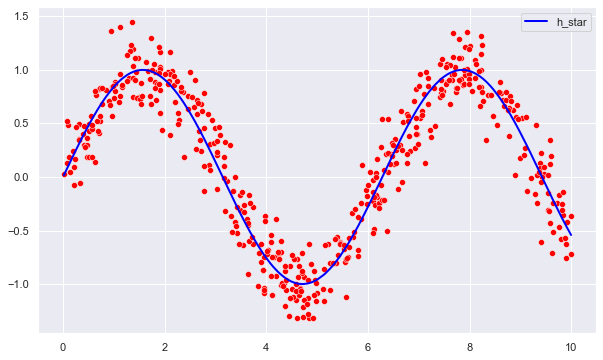

In [2]:
# generating mock dataset

n = 500
X = np.random.uniform(0, 10, n)
y = np.sin(X) + np.random.normal(0, 0.2, n)

# the best possible model
h_star_x = np.sin(X)

# plot x and y as a scatter plot
sns.scatterplot(x = X, y = y, color = 'red')

# plotting the true function in blue
sns.lineplot(x = X, y = h_star_x, label='h_star',
             linewidth = 2, color = 'blue')

Let's do a train-test split so we can get a sense of if we're over fitting.

In [3]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1),
                                                    y.reshape(-1, 1),
                                                    test_size=0.25,
                                                    random_state=77)

Now we are going to fit a decision tree regressor to the dataset using sklearn.

In [4]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# make an instance of the Model
clf = DecisionTreeRegressor(random_state = 0)
  
# train the model on the data
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Let's visualize the model on our data.

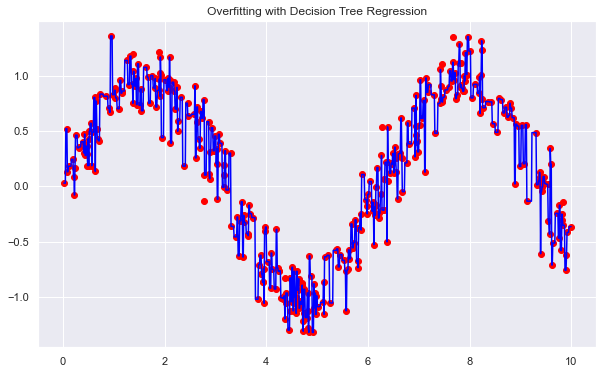

In [5]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X_train, y_train, color = 'red')
  
# plot predicted data
plt.plot(X_grid, clf.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Overfitting with Decision Tree Regression') 
  
# show the plot
plt.show()

How "big" is this tree?

In [6]:
print(clf.tree_.node_count)

749


Let's visualize the splits another way.

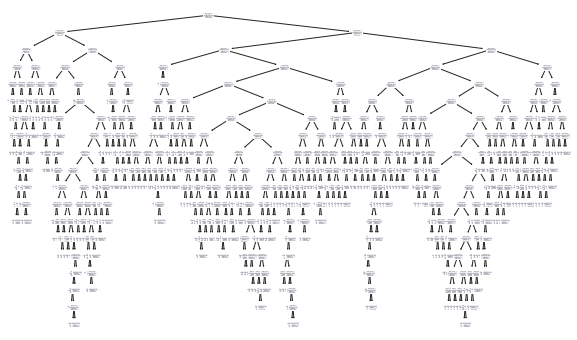

In [7]:
from sklearn import tree

tree.plot_tree(clf)
plt.show()

Lets calculate our in-sample and out-of-sample performance metrics.

In [8]:
# Calculates RMSE
from sklearn.metrics import mean_squared_error

# get in sample predictions
yhat_in_sample = clf.predict(X_train)

# get oos predictions
yhat_oos = clf.predict(X_test)

# IN SAMPLE
print(f"In sample R^2: {round(clf.score(X_train, y_train), 6)}")
print(f"In sample RMSE {round(mean_squared_error(y_true=y_train, y_pred=yhat_in_sample, squared=False), 6)}")

# OOS
print(f"OOS R^2: {round(clf.score(X_test, y_test), 6)}")
print(f"OOS RMSE {round(mean_squared_error(y_true=y_test, y_pred=yhat_oos, squared=False), 6)}")


In sample R^2: 1.0
In sample RMSE 0.0
OOS R^2: 0.846276
OOS RMSE 0.27316


Obviously overfit. Let's try lowering the complexity by reducing the maximum depth of the tree.

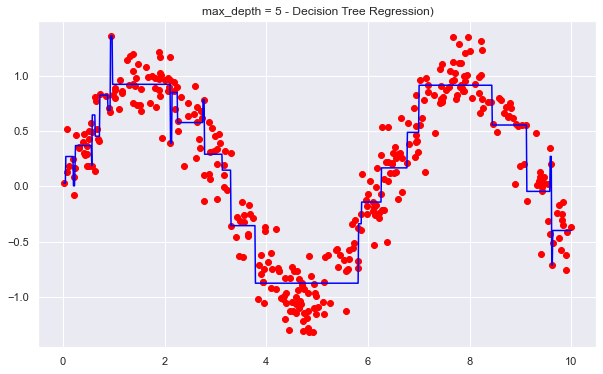

In [9]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# make an instance of the Model
clf = DecisionTreeRegressor(max_depth = 5, # reduced depth to 5
                            random_state = 0)
  
# train the model on the data
clf.fit(X_train, y_train)

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X_train, y_train, color = 'red')
  
# plot predicted data
plt.plot(X_grid, clf.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('max_depth = 5 - Decision Tree Regression)')
  
# show the plot
plt.show()

In [10]:
# how big is the tree?
print(clf.tree_.node_count)

61


In [11]:
# Calculates RMSE
from sklearn.metrics import mean_squared_error

# get in sample predictions
yhat_in_sample = clf.predict(X_train)

# get oos predictions
yhat_oos = clf.predict(X_test)

# IN SAMPLE
print(f"In sample R^2: {round(clf.score(X_train, y_train), 6)}")
print(f"In sample RMSE {round(mean_squared_error(y_true=y_train, y_pred=yhat_in_sample, squared=False), 6)}")

# OOS
print(f"OOS R^2: {round(clf.score(X_test, y_test), 6)}")
print(f"OOS RMSE {round(mean_squared_error(y_true=y_test, y_pred=yhat_oos, squared=False), 6)}")


In sample R^2: 0.919491
In sample RMSE 0.200336
OOS R^2: 0.87732
OOS RMSE 0.244024


Less overfitting now but now it's clearly underfit! We can play with the nodesize. Or we can use the model selection algorithm to pick the model (the nodesize). Let's ensure nodesize = 1 gives us perfect overfitting.

Also, tinker with the variance on `X` and see what happens to the performance metrics.

In [12]:
# remember to read documentation
#help(clf)

## Regression Trees with Real Data

Now let's look at a regression tree model predicting medv in the Boston Housing data. We first load the data and do a training-test split.

In [13]:
from sklearn import datasets

# lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# load the Boston Housing dataset as bh
bh = datasets.load_boston()

# create Boston Housing df
X = pd.DataFrame(data = bh.data, columns = bh.feature_names)

# snapshot
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
# define response variable
y = pd.Series(bh.target)
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=77)

In [16]:
# fitting regression tree
from sklearn.tree import DecisionTreeRegressor 
  
# make an instance of the Model
clf = DecisionTreeRegressor(max_depth = 5, 
                            random_state = 0)
  
# train the model on the data
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [17]:
# how big is the tree?
print(clf.tree_.node_count)

55


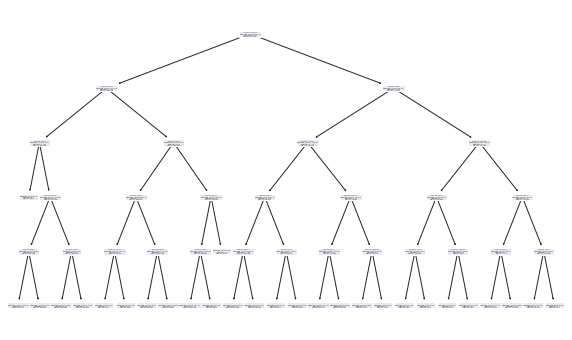

In [18]:
# lets visualize the tree
tree.plot_tree(clf)
plt.show()

And let's calculate performance metrics.

In [19]:
# Calculates RMSE
from sklearn.metrics import mean_squared_error

# get in sample predictions
yhat_in_sample = clf.predict(X_train)

# get oos predictions
yhat_oos = clf.predict(X_test)

# IN SAMPLE
print(f"In sample R^2: {round(clf.score(X_train, y_train), 6)}")
print(f"In sample RMSE {round(mean_squared_error(y_true=y_train, y_pred=yhat_in_sample, squared=False), 6)}")

# OOS
print(f"OOS R^2: {round(clf.score(X_test, y_test), 6)}")
print(f"OOS RMSE {round(mean_squared_error(y_true=y_test, y_pred=yhat_oos, squared=False), 6)}")

In sample R^2: 0.931423
In sample RMSE 2.444399
OOS R^2: 0.818749
OOS RMSE 3.693328


Recall the multivariate linear model:

In [20]:
from sklearn.linear_model import LinearRegression

# initialize model
linear_model = LinearRegression(fit_intercept = True)

# fit model
linear_model.fit(X_train, y_train)

# get in sample predictions
yhat_in_sample = linear_model.predict(X_train)

# get oos predictions
yhat_oos = linear_model.predict(X_test)

# IN SAMPLE
print(f"In sample R^2: {round(linear_model.score(X_train, y_train), 6)}")
print(f"In sample RMSE {round(mean_squared_error(y_true=y_train, y_pred=yhat_in_sample, squared=False), 6)}")

# OOS
print(f"OOS R^2: {round(linear_model.score(X_test, y_test), 6)}")
print(f"OOS RMSE {round(mean_squared_error(y_true=y_test, y_pred=yhat_oos, squared=False), 6)}")

In sample R^2: 0.736283
In sample RMSE 4.793478
OOS R^2: 0.744678
OOS RMSE 4.383506


The tree seems to win in-sample. Why? 

Is this a "fair" comparison?

The take-home message here is that the tree beats the linear model in future predictive performance but the only way to be truly convinced of this is to do the split over and over to get a sense of the average over the massive variability (like the previous demo) or to do CV to reduce the error of the estimate. 

Why does the regression tree beat the linear model? Let's see how many observations are in each leaf.

In [21]:
len(X_train) / clf.tree_.node_count

6.890909090909091

That's a very flexible model.

## Classification Trees

Let's get the cancer biopsy data. We'll use the same procedure. First we train test split, then we'll fit the model, and lastly calculate performance metrics.

For regression models I used the `DecisionTreeRegressor` function, now we will use the `DecisionTreeClassifier` sklearn function.

In [22]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(y)
X

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=77)

Now we will fit the tree.

In [24]:
# fitting regression tree
from sklearn.tree import DecisionTreeClassifier 
  
# make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 5, 
                            random_state = 0)
  
# train the model on the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

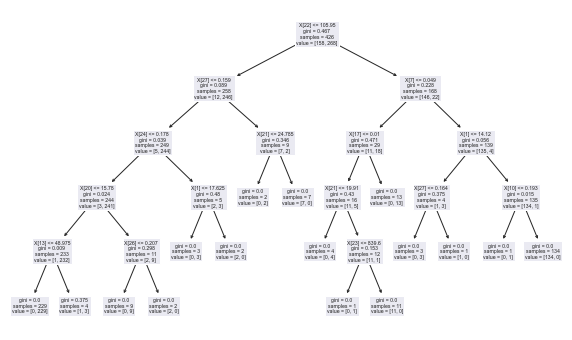

In [25]:
# lets visualize the tree
tree.plot_tree(clf)
plt.show()

It appears we overfit. But this is still pretty good!

Now let's take a look at the linear SVM model. Let's use default cost (we should really CV over the cost parameter if we weren't lazy).

In [26]:
#Import svm module
from sklearn import svm

#Create a svm Classifier object
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

# fit the data 
svm_clf.fit(X, y)

SVC(kernel='linear')

A couple of points:

* Reached max iterations to minimize the hinge loss. Seems like there are computational issues here.
* Note that we are relying on the $\lambda$ hyperparameter value for the hinge loss. On the homework, you will answer the question we never answered: how should the value of the hyperparameter be chosen?

Regardless, how did are our in-sample and OOS performance metrics for both the classification decision tree model and the SVM model?
Note that the closer the metric is to 0 the better.

In [27]:
# Decision Tree performance

# get in sample predictions
yhat_in_sample = clf.predict(X_train)

# get oos predictions
yhat_oos = clf.predict(X_test)

# print metrics
print("Decision Tree Performance:")
print(f"In Sample: {round(np.mean(y_train != yhat_in_sample), 6)}")
print(f"OOS: {round(np.mean(y_test != yhat_oos), 6)}\n")

# SVM performance

# get in sample predictions
yhat_in_sample = svm_clf.predict(X_train)

# get oos predictions
yhat_oos = svm_clf.predict(X_test)

# print metrics
print("SVM Performance:")
print(f"In Sample: {round(np.mean(y_train != yhat_in_sample), 6)}")
print(f"OOS: {round(np.mean(y_test != yhat_oos), 6)}\n")

Decision Tree Performance:
In Sample: 0.002347
OOS: 0.055944

SVM Performance:
In Sample: 0.030516
OOS: 0.041958



Maybe the model truly was linearly separable? Meaning, you don't get any added benefit from the tree if there are no interactions or non-linearities. Let's try a harder dataset.

In [28]:
# URL for adult Data
url = "https://raw.githubusercontent.com/sfnxboy/342-2022-Python-Practice-lectures/main/Datasets/ucidata_adult.csv"
adult = pd.read_csv(url, error_bad_lines=False)

# snapshot of dataframe
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Now lets process the data.

In [29]:
# dropping rows that contain a missing value
adult = adult.dropna()

adult = adult.reset_index()

# defining X and y
X = adult.iloc[:, :-1]
y = adult.iloc[:, -1]

# dummifying categorical variables
X = pd.get_dummies(X)

y = [1 if y[i] == '>50K' else 0 for i in range(len(y))]

# adding 1 vector to X
X.insert(0, "one_vec", 1)

Now let's train test split.

In [30]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 1999)

We are ready to fit a classification decision tree on the data.

In [31]:
# fitting regression tree
from sklearn.tree import DecisionTreeClassifier 
  
# make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 5, 
                             random_state = 0)
  
# train the model on the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

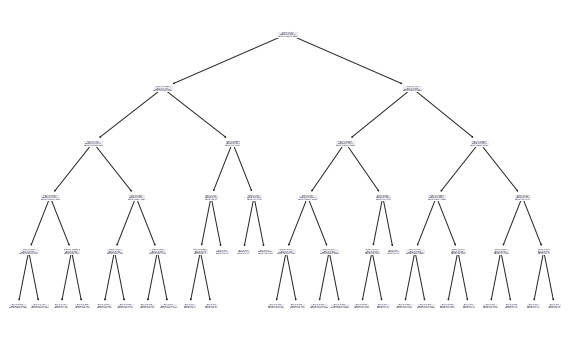

In [32]:
# lets visualize the tree
tree.plot_tree(clf)
plt.show()

Let's also fit an SVM model on the data. This might take a while since `n` is great and so is `p+1`.

In [33]:
#Import svm module
from sklearn import svm

#Create a svm Classifier object
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

# fit the data 
svm_clf.fit(X, y)

SVC(kernel='linear')

Lastly we'll compare in sample and out of sample missclassification error.

In [34]:
# Decision Tree performance

# get in sample predictions
yhat_in_sample = clf.predict(X_train)

# get oos predictions
yhat_oos = clf.predict(X_test)

# print metrics
print("Decision Tree Performance:")
print(f"In Sample: {round(np.mean(y_train != yhat_in_sample), 6)}")
print(f"OOS: {round(np.mean(y_test != yhat_oos), 6)}\n")


# SVM performance

# get in sample predictions
yhat_in_sample = svm_clf.predict(X_train)

# get oos predictions
yhat_oos = svm_clf.predict(X_test)

# print metrics
print("SVM Performance:")
print(f"In Sample: {round(np.mean(y_train != yhat_in_sample), 6)}")
print(f"OOS: {round(np.mean(y_test != yhat_oos), 6)}\n")

Decision Tree Performance:
In Sample: 0.15725
OOS: 0.156743

SVM Performance:
In Sample: 0.209991
OOS: 0.204615



Looks like we overfit quite a bit! That's what nodesize of 1 does! Why is it the default? People found that even though it overfits, you still get good performance (as we've seen even with regression). I doubt people still use CART in production models that require best possible accuracy these days since this issue of overfitting was fixed with bagging (we will get to this soon) and Random Forests (we'll get to that too).

The linear SVM does much worse than the classification decision tree. Likely there are a lot of interactions in this dataset that the linear SVM must ignore because it's $\mathcal{H}$ candidate set is so limited!